# Exercício
## Naive-Bayes e Perceptron
### Alunos (Nome e número usp):
- Fernanda Tostes Marana (4471070)
- Matheus Aparecido do Carmo Alves (9791114)
- Thais Bianchini (9791010)
---

Para esse exercício será utilizado um conjunto de imagens de dois caracteres, "V" normal e "V" invertido. As imagems possuem dimensão 30x30 e estão em escala de cinza. Cada imagem é representada por uma linha no conjunto de dados (a imagem 30x30 foi transformada em um vetor 1x900). A última coluna desse conjunto representa a classe da imagem, sendo que o valor 0 corresponde ao caractere "V", e 1 ao "V" invertido.



---

### Questão 1. 

Carregue o arquivo "data.npy" utilizando a biblioteca `numpy` e mostre a imagem de número 0 e a imagem de número 10 utilizando a função `imshow()` da biblioteca `matplotlib`. Note que você deve redimensionar a imagem para seu formato original para usar essa função.

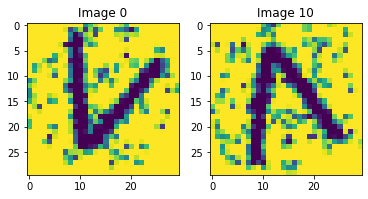

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Loading the data
data = np.load('data.npy')

# Plotting the images 1 and 10 from data
fig = plt.figure()

image = data[0][:-1]
ax = fig.add_subplot(121)
ax.imshow(image.reshape((30,30)))
ax.set_title('Image 0')

image = data[10][:-1]
ax = fig.add_subplot(122)
ax.imshow(image.reshape((30,30)))
ax.set_title('Image 10')

plt.show()



---

### Questão 2.

Separe o conjunto em 75% treino e 25% teste. Utilize o parâmetro `stratify=y`, onde `y` representa seu conjunto de classes.


In [0]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test set
X_train, X_test, Y_train, Y_test =\
 train_test_split(data[:,:-1],data[:,-1], test_size=0.25,stratify=data[:,-1])

print('Train set size:', len(X_train))
print('Test set size:', len(X_test))

Train set size: 12
Test set size: 4




---
### Questão 3.

Treine os classificadores `Perceptron` e `GaussianNB` no conjunto de treino e exiba suas acurácias no conjunto de teste. 


In [0]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Perceptron
# --- initialising the perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)

# --- training the perceptron
ppn.fit(X_train, Y_train)

# --- classifying the examples
ppn_pred = ppn.predict(X_test)

# Naive Bayes
# --- initialising the GaussianNB
gnb = GaussianNB()

# --- training the model
gnb.fit(X_train,Y_train)

# --- classifying the examples
gnb_pred = gnb.predict(X_test)

# Printing the result
print ("Accuracy of Perceptron: ", accuracy_score(Y_test, ppn_pred)) 
print ("Accuracy of Gaussian: ", accuracy_score(Y_test, gnb_pred)) 

Accuracy of Perceptron:  1.0
Accuracy of Gaussian:  1.0




---
### Questão 4.

Crie um conjunto de testes carregando os arquivos `0.png`, `1.png`, `2.png` e `3.png`. Para isso, utilize a função `imread()` passando como parâmetro `as_gray=True`. Seu conjunto final deve possuir dimensões (4, 900), ou seja, 4 observações de tamanho 900.


In [0]:
from skimage.io import imread

# Creating a dataset from images 0,1,2 and 3 (png)
X = []
for imname in ['0.png','1.png','2.png','3.png']:
  X.append(imread(imname,as_gray=True))
X = np.array([np.array(im).reshape(900) for im in X])
Y = [0,1,1,0]

print('Dataset shape:',X.shape)

Dataset shape: (4, 900)




---

### Questão 5.

Teste os classificadores treinados no conjunto de testes que você criou e calcule a acurácia.

In [0]:
# Perceptron
# --- classifying the created examples
ppn_pred = ppn.predict(X)

# Naive Bayes
# --- classifying the created examples
gnb_pred = gnb.predict(X)

# Printing the result
print ("Accuracy of Perceptron: ", accuracy_score(Y, ppn_pred)) 
print ("Accuracy of Gaussian: ", accuracy_score(Y, gnb_pred)) 

Accuracy of Perceptron:  0.75
Accuracy of Gaussian:  1.0




---

### Questão 6.
Agora você deve calcular e exibir a confiança dos classificadores para o conjunto que você criou. Para o caso do `Perceptron`, podemos calcular a distância da classe ao hiperplano separador (isso pode ser feito utilizando-se a função membro `decision_function()`). Para o `GaussianNB`, utiliza-se o vetor de probabilidades para cada exemplo (isso pode ser feito utilizando-se a função membro `predict_proba()`). 

Comente a relação entre o valor da distância/probabilidades e a "incerteza" de um classificador. Em outras palavras, o que poderíamos observar nesses valores caso nosso classificador fosse incerto? Comente tanto para o caso do `GaussianNB` quanto para o `Perceptron`.


In [0]:
from math import sqrt
# Calculating the reliability of our classifiers
# --- creating a dataset with all examples
X_all_test = []
for i in range(len(X_test)):
  X_all_test.append(X_test[i])
for i in range(len(X)):
  X_all_test.append(X[i])

print('Dataset size:',len(X_all_test)) 

# --- Perceptron and GaussianNB classifying
ppn_pred = ppn.decision_function(X_all_test)
gnb_pred = gnb.predict_proba(X_all_test)

# --- printing the result
print("Perceptron:",ppn_pred)
print("Naive Bayes:",gnb_pred)


Dataset size: 8
Perceptron: [-6.02028115 -7.03490599  2.1663189   5.58583438 -3.1621858  -0.48956933
  1.09965061 -2.80617518]
Naive Bayes: [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


**RESPOSTA:**


Diante dos resultados apresentado em ambos classificadores, conseguimos concluir que a "incerteza" para o conjunto de dados é baixa. Isso acontece não só porque as distâncias das classes ao hiperplano separador é alta, como também é bem definida. Já no vetor de probabilidade calculado pelo Naive Bayes, há 100% de certeza se uma imagem é invertida ou não. Adicionalmente, ao se realizar uma comparação entre o vetor de distâncias e o de probabilidades, nota-se que classes com distâncias negativas possuem 100% de probabilidade no lado esquerdo no vetor de probabilidades enquanto classes com distâncias positivas possuem também 100% de probabilidade no lado direito do conjunto.

Devido ao tamanho pequeno do conjunto de dados (8 imagens e 8 imagens invertidas) não há como garantir que esses resultados permancerão bem definidos ao serem treinados em outros conjuntos. Assim é possível dizer que a "incerteza" é pequena nesses classificadores, mas isso não os torna completamente confiáveis.
